In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit
import emcee
from pprint import pprint

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood(A,f_b,alpha_H,poisson):
    alpha_L = 1.0
    
    perdata091 = pd.read_csv("perlist091.csv")
    f = perdata091['f']
    per = perdata091['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata091)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
m=Minuit(twi_minus_loglikelihood,A=0.005,f_b=1.7E-4,alpha_H=3.8,poisson=0.8,
         error_A=0.0001,error_f_b=1.0E-5,error_alpha_H=0.01,error_poisson=0.01,
         limit_A=(0.001,0.1), limit_f_b=(1.0E-5,1.0E-3),limit_alpha_H=(1.5,5.0),limit_poisson=(0,2),
         errordef=1)

In [4]:
m.migrad()

4223.4452608304
4223.361558290925
4223.5290425932
4223.02399921299
4223.868536823716
4223.144481887453
4223.747292818687
4223.4615302246675
4223.42898895197
4223.607843087468
4223.282430156844
4222.539358441944
4224.352109040294
4222.123531130171
4224.76900490336
4223.282430156844
4222.628610779637
4220.97635657038
4215.861337989545
4198.85322638458
4119.687940241321
3828.7760604731398
3827.928362654005
3829.6267760392843
3828.5711651241277
3828.9813116396904
3828.312385158291
3829.2415619728686
3828.700530374564
3828.8742994682057
3828.752334665846
3828.801612470786
3828.1454341773715
3829.4075928818725
3549.4422043802865
3547.812125892744
3545.3027710532424
3545.4336387669237
3545.172642105906
3545.5010511800424
3545.1061819362203
3545.365772087178
3545.2397790929012
3545.933072029541
3544.6733814921
3545.302605417433
3545.3030700609525
3545.302789238547
3545.30444404573
3545.181497809183
3545.4244759328226
3545.063151063847
3545.544082052365
3526.2444126653845
3489.0561717749088
349

FCN = 3378.2594849242523 
 TOTAL NCALL = 371 
 NCALLS = 371 
 
 
 EDM = 8.690936542380435e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.0764936,0.0858979,,,0.001,0.1,No
1,f_b,2.13441e-05,2.06212e-05,,,1e-05,0.001,No
2,alpha_H,2.52888,0.269737,,,1.5,5,No
3,poisson,1.74465,0.0592741,,,0,2,No


({'fval': 3378.2594849242523,
  'edm': 8.690936542380435e-06,
  'nfcn': 371,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'A',
   'value': 0.07649359183497186,
   'error': 0.08589785452742658,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.001,
   'upper_limit': 0.1},
  {'number': 1,
   'name': 'f_b',
   'value': 2.134408567530149e-05,
   'error': 2.0621201103085964e-05,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 1e-05,
   'upper_limit': 0.001},
  {'number': 2,
   'name': 'alpha_H',
   'value': 2.528884417521735,
   'error': 0.26973688352116243,

In [5]:
pprint(m.fval)
m.print_param()

3378.2594849242523


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.0764936,0.0858979,,,0.001,0.1,No
1,f_b,2.13441e-05,2.06212e-05,,,1e-05,0.001,No
2,alpha_H,2.52888,0.269737,,,1.5,5,No
3,poisson,1.74465,0.0592741,,,0,2,No


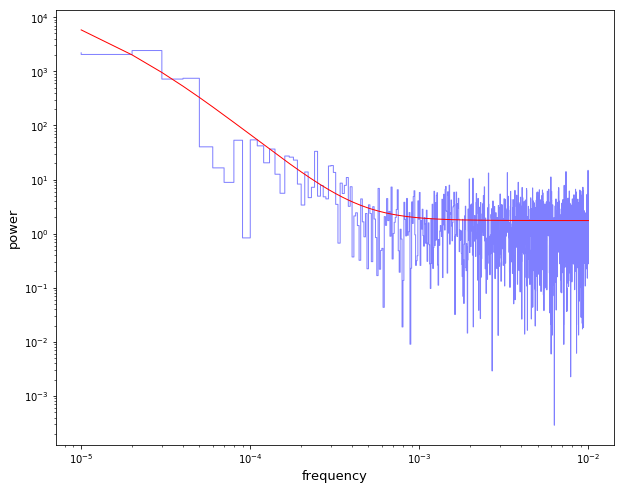

In [6]:
perdata091 = pd.read_csv("perlist091.csv")
f = perdata091['f']
per = perdata091['per']

alpha_L = 1.0
A,f_b,alpha_H,poisson = m.values[0],m.values[1],m.values[2],m.values[3]

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [7]:
def twi_minus_loglikelihood_nobreak(A,alpha,poisson):
    alpha_L = 1.0
    
    perdata091 = pd.read_csv("perlist091.csv")
    f = perdata091['f']
    per = perdata091['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*A+poisson)
     
    
    length = len(perdata091)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [8]:
n=Minuit(twi_minus_loglikelihood_nobreak,A=1.0E-7,alpha=2.0,poisson=1.0,
         error_A=0.0001,error_alpha=0.01,error_poisson=0.01,
         limit_A=(0.0000001,0.1),limit_alpha=(1.0,4.0),limit_poisson=(0,2),
         errordef=1)

In [9]:
n.migrad()

3776.925159937469
3717.8384055603087
3858.5415575365723
3769.7740369099697
3784.340794998022
3776.5192397311116
3777.33214419748
3776.5183856893696
3777.3323318470952
3776.059855359489
3777.792265971041
3489.8470290019295
3489.6207929217658
3487.00173131156
3487.2052981515135
3486.7988656792036
3487.315535898695
3486.6895899368646
3487.1995932068025
3486.8046396877066
3487.2927428013486
3486.7123830311557
3486.771790217632
3487.2322707638114
3486.618701360324
3487.3864244723595
3433.8006973044116
3398.825919706598
3398.616262946979
3399.0400994442493
3398.6998589425984
3398.953601634863
3398.661665035075
3398.992564829635
3398.705600563492
3398.9469983274817
3398.650386221208
3399.0030743566167
3389.6075299366853
3387.4162781894706
3387.3599551228745
3387.3969239220037
3387.324114333453
3387.392131773502
3387.329152998324
3387.2771989510206
3387.4438882281543
3384.121289029488
3383.153659618951
3383.111155257625
3383.1084107783977
3383.1157156367603
3383.0953943986847
3383.128612477358

FCN = 3380.0158677164827 
 TOTAL NCALL = 155 
 NCALLS = 155 
 
 
 EDM = 0.00015021232732356085 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,1.0001e-07,7.3084e-08,,,1e-07,0.1,No
1,alpha,2.18402,0.0185676,,,1,4,No
2,poisson,1.72289,0.0576111,,,0,2,No


({'fval': 3380.0158677164827,
  'edm': 0.00015021232732356085,
  'nfcn': 155,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'A',
   'value': 1.0001047834659255e-07,
   'error': 7.308402197780878e-08,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 1e-07,
   'upper_limit': 0.1},
  {'number': 1,
   'name': 'alpha',
   'value': 2.184018858005623,
   'error': 0.018567609371347382,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 1.0,
   'upper_limit': 4.0},
  {'number': 2,
   'name': 'poisson',
   'value': 1.7228862319762974,
   'error': 0.05761106666790328,


In [10]:
pprint(n.fval)
n.print_param()

3380.0158677164827


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,1.0001e-07,7.3084e-08,,,1e-07,0.1,No
1,alpha,2.18402,0.0185676,,,1,4,No
2,poisson,1.72289,0.0576111,,,0,2,No


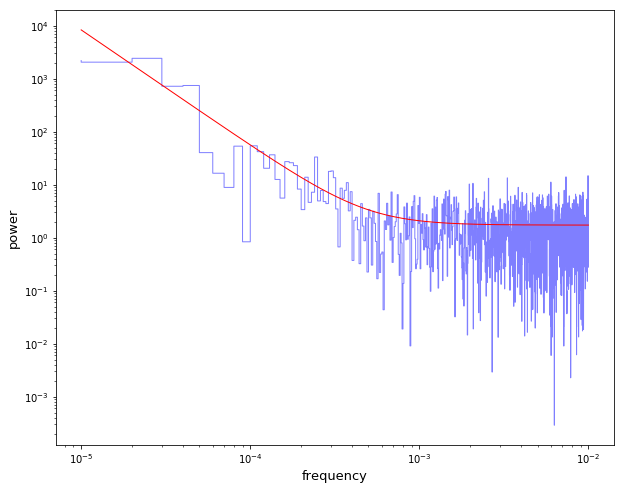

In [11]:
A,alpha,poisson = n.values[0],n.values[1],n.values[2]

model2 = []
f_length = len(f)
for i in range(f_length):
    model2.append((f[i]**(-alpha))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model2, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [12]:
# 对无截断幂律谱尝试emcee

# 均匀先验

def lnprior(theta):
    A,alpha,poisson = theta
    if 1.0E-8 < A < 1.0E-7 and 1.0 < alpha < 4.0 and 0.0 < poisson < 2.0:
        return 0.0
    return -np.inf

# 后验概率？

def lnprob(theta):
    A,alpha,poisson = theta
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return (lp - 0.5* twi_minus_loglikelihood_nobreak(A,alpha,poisson))

In [13]:
# emcee

ndim, nwalkers = 3, 100
pos = [[n.values[0],n.values[1],n.values[2]] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(pos, 500)

F:\Anaconda\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
F:\Anaconda\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


3455.5093466153216
3396.5447237856324
3419.486728843438
3385.8966760116655
3386.9813951292695
3467.6272502762845
3402.727402857737
3409.1202211439777
3423.1891001606473
3381.0107320400575
3482.10594645961
3405.662309581398
3390.4960806147683
3387.9818558327984
3461.0151335220216
3396.9314254031624
3472.4621345770897
3464.334370067998
3409.9638692417097
3380.2465781827923
3470.7303372941888
3560.051955862205
3380.013299872393
3428.6555437302286
3381.8635107283435
3409.4576059066376
3385.558993205053
3380.0697099460626
3431.754752817926
3408.6341943833845
3382.8289346708493
3380.781941317418
3381.2611566130277
3384.019783562152
3383.593344347402
3409.280150799735
3380.0044145633024
3404.5680464068
3382.5469575803972
3444.585246388804
3397.9552514682
3381.8580084082027
3407.4335577914803
3445.445364655161
3381.44978210291
3521.252640058565
3411.096297476177
3380.002666645705
3380.6157461498597
3388.024111943044
3381.3556910147704
3380.258201582411
3380.027480031874
3381.6104980056803
3381

3381.6130342737592
3380.132081901905
3383.452279773121
3380.8026633098584
3380.7897336322912
3379.6813894774295
3382.6172473851543
3381.8051956018826
3383.785024858635
3415.0714337942336
3380.542688630796
3382.771331851302
3380.859186801541
3384.226925314994
3380.948254009877
3382.9962171858606
3384.174507294239
3380.1162062698736
3382.952118191245
3382.9615896452997
3390.5072429272323
3384.645916978702
3382.3116878615238
3387.2755867427636
3382.76057335379
3380.770022046868
3381.2878385053527
3384.912107896156
3379.888803329227
3381.360971620847
3379.884523101467
3381.9217854827516


(array([[-4.37772382e-05,  2.18422661e+00,  1.72294966e+00],
        [ 8.23340138e-08,  2.18372294e+00,  1.72311583e+00],
        [-2.61738311e-05,  2.18407487e+00,  1.72277573e+00],
        [ 2.77234087e-05,  2.18398545e+00,  1.72285941e+00],
        [ 9.14710004e-05,  2.18377459e+00,  1.72287982e+00],
        [ 8.21516309e-08,  2.17632497e+00,  1.72279971e+00],
        [-7.56741417e-05,  2.18411785e+00,  1.72281259e+00],
        [ 8.13818064e-08,  2.20322012e+00,  1.71070896e+00],
        [ 1.08445908e-04,  2.18412312e+00,  1.72283323e+00],
        [-3.04142308e-05,  2.18398625e+00,  1.72300322e+00],
        [-1.41264753e-04,  2.18386869e+00,  1.72299434e+00],
        [-7.91131622e-05,  2.18411629e+00,  1.72287025e+00],
        [-1.24540949e-04,  2.18408379e+00,  1.72291566e+00],
        [-1.70285992e-04,  2.18411445e+00,  1.72307096e+00],
        [-3.71220349e-05,  2.18393776e+00,  1.72273932e+00],
        [ 1.91201586e-04,  2.18397760e+00,  1.72269846e+00],
        [ 9.47158595e-05

In [14]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

labels = ["A", "alpha","poisson"]

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.7f}_{{-{1:.7f}}}^{{{2:.7f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>